In [ ]:
TRAIN_PATH = "/content/drive/MyDrive/dataset/training"
VAL_PATH = "/content/drive/MyDrive/dataset/validation"
#1.0 includes re-evaluating steps_per_epoch parameter

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.preprocessing import image
from keras.models import Sequential

In [ ]:
model = Sequential()
model.add(Conv2D(64, kernel_size= (3,3), activation='relu', input_shape=(256, 256, 3))) #32
model.add(Conv2D(128, (3,3), activation='relu')) #64
model.add(MaxPooling2D(pool_size= (2,2)))
#model.add(Dropout(0.25))


model.add(Conv2D(128, (3,3), activation='relu')) #64
model.add(MaxPooling2D(pool_size= (2,2)))
#model.add(Dropout(0.25))


model.add(Conv2D(256, (3,3), activation='relu')) #128
model.add(MaxPooling2D(pool_size= (2,2)))
#model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(128, activation='relu')) #64
#model.add(Dropout(0.25))
model.add(Dense(3, activation='softmax'))

model.compile(loss= 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 252, 252, 128)     73856     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 126, 126, 128)     0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 124, 124, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 60, 60, 256)       295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 256)       0

In [ ]:
train_datagen = image.ImageDataGenerator(
      rescale=1./255,
      shear_range=0.1, #0.2
      zoom_range=0.1, #0.2
      horizontal_flip=True,
      )
test_dataset = image.ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/dataset/training/',
    target_size = (256,256),
    color_mode = 'rgb',
    batch_size = 32, 
    class_mode= 'categorical'
)

Found 2279 images belonging to 3 classes.


In [ ]:
train_generator.class_indices

{'covid': 0, 'normal': 1, 'viral': 2}

In [ ]:
validation_generator = test_dataset.flow_from_directory(
    '/content/drive/MyDrive/dataset/validation/',
    target_size = (256,256),
    batch_size = 32, 
    class_mode = 'categorical'
)

Found 569 images belonging to 3 classes.


In [ ]:
hist = model.fit(
    train_generator,
    steps_per_epoch = 70,  
    epochs = 30, #10 
    validation_data = validation_generator,
    validation_steps =2
)

Epoch 1/30
70/70 [==============================] - 1622s 23s/step - loss: 1.3096 - accuracy: 0.5342 - val_loss: 0.3285 - val_accuracy: 0.8594
Epoch 2/30
70/70 [==============================] - 110s 2s/step - loss: 0.4374 - accuracy: 0.8066 - val_loss: 0.3473 - val_accuracy: 0.8594
Epoch 3/30
70/70 [==============================] - 86s 1s/step - loss: 0.2809 - accuracy: 0.8978 - val_loss: 0.2813 - val_accuracy: 0.9062
Epoch 4/30
70/70 [==============================] - 76s 1s/step - loss: 0.2272 - accuracy: 0.9254 - val_loss: 0.3010 - val_accuracy: 0.8906
Epoch 5/30
70/70 [==============================] - 67s 956ms/step - loss: 0.2417 - accuracy: 0.9156 - val_loss: 0.2712 - val_accuracy: 0.8594
Epoch 6/30
70/70 [==============================] - 65s 924ms/step - loss: 0.2331 - accuracy: 0.9190 - val_loss: 0.3452 - val_accuracy: 0.8906
Epoch 7/30
70/70 [==============================] - 57s 816ms/step - loss: 0.1975 - accuracy: 0.9231 - val_loss: 0.1947 - val_accuracy: 0.9844
Epoch 8

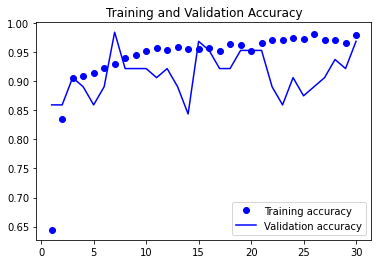

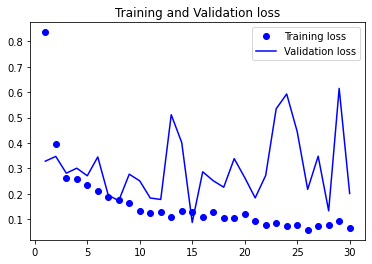

In [ ]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()